In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = "./data/airrship_shm_seed24_100_000.tsv"
df_data = pd.read_csv(data_path, sep="\t")
df_data.head()

,sequence_id,sequence,productive,stop_codon,vj_in_frame,v_call,d_call,j_call,junction,junction_aa,...,d_sequence_start,d_sequence_end,j_sequence_start,j_sequence_end,shm_events,shm_count,shm_freq,unmutated_sequence,gapped_unmutated_sequence,gapped_mutated_sequence
0,0,CAGGTGCAGTTGGTCCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,T,T,F,IGHV1-69*19,IGHD6-13*01,IGHJ6*04,TGTGCGTGTCGTAACAGCAGGCGTTATTTCTCCTACGGCTTGGACG...,CACRNSRRYFSYGLDVW,...,297,305,310,367,"10:C>T,15:G>C,70:G>A,72:T>C,89:G>A,92:G>C,97:G...",37,0.100817,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,CAGGTGCAGCTGGTGCAGTCTGGGGCT...GAGGTGAAGAAGCCTG...,CAGGTGCAGTTGGTCCAGTCTGGGGCT...GAGGTGAAGAAGCCTG...
1,1,GAGGTGTATTTGGTGGAGTCTGGGGGAGCCCTAGCATTGGCGGGGG...,T,T,F,IGHV3-23*04,IGHD3-10*02,IGHJ4*01,TGTGCGAAAGTTCATTTACTTTGTTCGGGGAGTGTCGACTATTGG,CAKVHLLCSGSVDYW,...,301,317,322,361,"7:C>T,9:G>T,10:C>T,29:G>C,31:T>C,33:G>A,35:T>C...",74,0.204986,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCTGGGGGA...GGCTTGGTACAGCCTG...,GAGGTGTATTTGGTGGAGTCTGGGGGA...GCCCTAGCATTGGCGG...
2,2,CACCTGCAATTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,T,T,F,IGHV4-39*01,IGHD3-10*02,IGHJ3*01,TGTGCGAGACAGATGTTATGTGATGCTCTTGATCTCTGG,CARQMLCDALDLW,...,305,309,310,358,"3:G>C,9:G>A,10:C>T,57:C>T,62:C>G,63:C>T,68:C>G...",47,0.131285,CAGCTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGCTGCAGCTGCAGGAGTCGGGCCCA...GGACTGGTGAAGCCTT...,CACCTGCAATTGCAGGAGTCGGGCCCA...GGACTGGTGAAGCCTT...
3,3,CAGGTGCAGCAGCAGGAGTCTGGGGGAAGCGTGGTCCAGCCGGGGA...,T,T,F,IGHV3-33*07,IGHD3-16*01,IGHJ4*01,TGTACGAGAGAGGTTCGGTATTATGATTACCTTTGGGGCTCCCCAC...,CTREVRYYDYLWGSPRFYGSDLW,...,304,322,345,385,"11:T>A,13:G>C,14:T>A,28:C>A,42:T>G,47:G>A,67:G...",47,0.122078,CAGGTGCAGCTGGTGGAGTCTGGGGGACGCGTGGTCCAGCCTGGGA...,CAGGTGCAGCTGGTGGAGTCTGGGGGA...CGCGTGGTCCAGCCTG...,CAGGTGCAGCAGCAGGAGTCTGGGGGA...AGCGTGGTCCAGCCGG...
4,4,CAGCCGCGTTTTCGGCAGTGGGGCGCAGGGCTGCTGAAGGCTTCGG...,T,T,F,IGHV4-34*01,IGHD5-24*01,IGHJ6*04,TGCGCGAGAGGCAGGAATCTTGGGACGGATTGGCTCTACGTGTATT...,CARGRNLGTDWLYVYSYFYGMDVW,...,313,315,325,385,"4:G>C,5:T>C,8:A>G,9:G>T,10:C>T,12:A>T,14:A>G,3...",53,0.137662,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGG...,CAGGTGCAGCTACAGCAGTGGGGCGCA...GGACTGTTGAAGCCTT...,CAGCCGCGTTTTCGGCAGTGGGGCGCA...GGGCTGCTGAAGGCTT...


In [3]:
inputs = ["sequence"]
pos_names = [f"{seg}_sequence_{pos}" for seg in "vdj" for pos in ("start", "end")]
inputs.extend(pos_names)
seg_names = [f"{seg}_sequence" for seg in "vdj"]
inputs.extend(seg_names)

df_input = df_data[inputs].copy()
df_input.head()

,sequence,v_sequence_start,v_sequence_end,d_sequence_start,d_sequence_end,j_sequence_start,j_sequence_end,v_sequence,d_sequence,j_sequence
0,CAGGTGCAGTTGGTCCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,1,291,297,305,310,367,CAGGTGCAGTTGGTCCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,TAACAGCAG,TATTTCTCCTACGGCTTGGACGTCTGGGACAAAGGGACCACGGTCA...
1,GAGGTGTATTTGGTGGAGTCTGGGGGAGCCCTAGCATTGGCGGGGG...,1,295,301,317,322,361,GAGGTGTATTTGGTGGAGTCTGGGGGAGCCCTAGCATTGGCGGGGG...,TTACTTTGTTCGGGGAG,GACTATTGGGGCCGAGGAACCCTGGTCATCGTCTCCTCAG
2,CACCTGCAATTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,1,299,305,309,310,358,CACCTGCAATTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,TATGT,GATGCTCTTGATCTCTGGGGCCCCGGGACAATGGTCACCGTCTCTTCAG
3,CAGGTGCAGCAGCAGGAGTCTGGGGGAAGCGTGGTCCAGCCGGGGA...,1,296,304,322,345,385,CAGGTGCAGCAGCAGGAGTCTGGGGGAAGCGTGGTCCAGCCGGGGA...,TATTATGATTACCTTTGGG,TGACCTCTGGGGCCAAGGGACCCTGGTCACCGTCTCGTCAG
4,CAGCCGCGTTTTCGGCAGTGGGGCGCAGGGCTGCTGAAGGCTTCGG...,1,293,313,315,325,385,CAGCCGCGTTTTCGGCAGTGGGGCGCAGGGCTGCTGAAGGCTTCGG...,TGG,TATTCCTACTTTTACGGCATGGATGTGTGGGACTATGGAACCACGG...


In [4]:
# Add random sequence to both ends of the sequences
rng = np.random.default_rng(seed=42)
len_range = np.arange(10, 16)
for i in range(df_input.shape[0]):
    rand_start_len = rng.choice(len_range)
    rand_end_len = rng.choice(len_range)
    rand_start = "".join(rng.choice(["A", "C", "G", "T"], rand_start_len))
    rand_end = "".join(rng.choice(["A", "C", "G", "T"], rand_end_len))
    df_input.loc[i, "sequence"] = rand_start + df_input.loc[i, "sequence"] + rand_end
    df_input.loc[i, pos_names] += rand_start_len
df_input.head()

,sequence,v_sequence_start,v_sequence_end,d_sequence_start,d_sequence_end,j_sequence_start,j_sequence_end,v_sequence,d_sequence,j_sequence
0,GCCTAGAAGTCAGGTGCAGTTGGTCCAGTCTGGGGCTGAGGTGAAG...,11,301,307,315,320,377,CAGGTGCAGTTGGTCCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,TAACAGCAG,TATTTCTCCTACGGCTTGGACGTCTGGGACAAAGGGACCACGGTCA...
1,GCCAAGTATTCGGAGGTGTATTTGGTGGAGTCTGGGGGAGCCCTAG...,13,307,313,329,334,373,GAGGTGTATTTGGTGGAGTCTGGGGGAGCCCTAGCATTGGCGGGGG...,TTACTTTGTTCGGGGAG,GACTATTGGGGCCGAGGAACCCTGGTCATCGTCTCCTCAG
2,GAGGTGCTCCTCCACCTGCAATTGCAGGAGTCGGGCCCAGGACTGG...,13,311,317,321,322,370,CACCTGCAATTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,TATGT,GATGCTCTTGATCTCTGGGGCCCCGGGACAATGGTCACCGTCTCTTCAG
3,TCATGGACTTCTTCAGGTGCAGCAGCAGGAGTCTGGGGGAAGCGTG...,14,309,317,335,358,398,CAGGTGCAGCAGCAGGAGTCTGGGGGAAGCGTGGTCCAGCCGGGGA...,TATTATGATTACCTTTGGG,TGACCTCTGGGGCCAAGGGACCCTGGTCACCGTCTCGTCAG
4,GCTGCGGAAAACGCAGCCGCGTTTTCGGCAGTGGGGCGCAGGGCTG...,14,306,326,328,338,398,CAGCCGCGTTTTCGGCAGTGGGGCGCAGGGCTGCTGAAGGCTTCGG...,TGG,TATTCCTACTTTTACGGCATGGATGTGTGGGACTATGGAACCACGG...


In [5]:
# check if the sequence, segment boundaries and segments are consistent
def check_consistence(row):
    pos_names = [ f"{seg}_sequence_{pos}" for seg in "vdj" for pos in ("start", "end") ]
    seq = row["sequence"]
    pos = row[pos_names]
    for seg in "vdj":
        cor_seq = row[seg + "_sequence"]
        start = pos[seg + "_sequence_start"] - 1
        end = pos[seg + "_sequence_end"]
        flag = (seq[start:end] == cor_seq)
    return flag

df_input.apply(check_consistence, axis=1).all()

True

count    100000.000000
mean        393.762700
std          12.879225
min         354.000000
25%         385.000000
50%         393.000000
75%         402.000000
max         468.000000
Name: sequence, dtype: float64

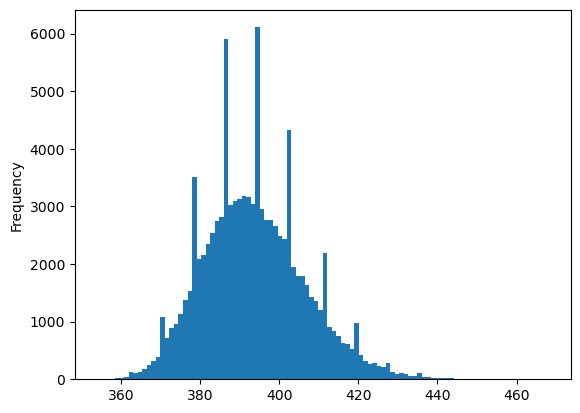

In [6]:
seq_len = df_input["sequence"].str.len()
seq_len.plot.hist(bins=100)
seq_len.describe()

In [7]:
output_path = data_path[:-4] + "_random_ends.tsv"
df_input.to_csv(output_path, sep="\t", index=False)
df_read = pd.read_csv(output_path, sep="\t")
df_read.head()

,sequence,v_sequence_start,v_sequence_end,d_sequence_start,d_sequence_end,j_sequence_start,j_sequence_end,v_sequence,d_sequence,j_sequence
0,GCCTAGAAGTCAGGTGCAGTTGGTCCAGTCTGGGGCTGAGGTGAAG...,11,301,307,315,320,377,CAGGTGCAGTTGGTCCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGT...,TAACAGCAG,TATTTCTCCTACGGCTTGGACGTCTGGGACAAAGGGACCACGGTCA...
1,GCCAAGTATTCGGAGGTGTATTTGGTGGAGTCTGGGGGAGCCCTAG...,13,307,313,329,334,373,GAGGTGTATTTGGTGGAGTCTGGGGGAGCCCTAGCATTGGCGGGGG...,TTACTTTGTTCGGGGAG,GACTATTGGGGCCGAGGAACCCTGGTCATCGTCTCCTCAG
2,GAGGTGCTCCTCCACCTGCAATTGCAGGAGTCGGGCCCAGGACTGG...,13,311,317,321,322,370,CACCTGCAATTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,TATGT,GATGCTCTTGATCTCTGGGGCCCCGGGACAATGGTCACCGTCTCTTCAG
3,TCATGGACTTCTTCAGGTGCAGCAGCAGGAGTCTGGGGGAAGCGTG...,14,309,317,335,358,398,CAGGTGCAGCAGCAGGAGTCTGGGGGAAGCGTGGTCCAGCCGGGGA...,TATTATGATTACCTTTGGG,TGACCTCTGGGGCCAAGGGACCCTGGTCACCGTCTCGTCAG
4,GCTGCGGAAAACGCAGCCGCGTTTTCGGCAGTGGGGCGCAGGGCTG...,14,306,326,328,338,398,CAGCCGCGTTTTCGGCAGTGGGGCGCAGGGCTGCTGAAGGCTTCGG...,TGG,TATTCCTACTTTTACGGCATGGATGTGTGGGACTATGGAACCACGG...


In [2]:
df_rand = pd.read_csv("./data/airrship_shm_seed24_100_000_random_ends.tsv", sep="\t")
with open("./data/airrship_shm_seed24_100_000_random_ends.fasta", "w") as f:
    for idx in df_rand.index:
        seq = df_rand.loc[idx, "sequence"]
        f.write(f">{idx}\n")
        f.write(f"{seq}\n")